In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
def month_saved(data):
    m,n = data.shape
    month_sa = []
    for i in range(12):
        T = []
        for j in range(m):
            if j%12 == i and data['TA_F_MDS'][j] != -9999:
                T.append(data['TA_F_MDS'][j])
        if np.mean(T) >= 0:
            month_sa.append(i+1)
    return month_sa

In [3]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

std_VPD = ['VPD_mean']
std_AVP = ['std_VPD']

days = 15
i0=0
for csv_file1 in os.listdir(path1):
    if csv_file1[31:33] =='HH':
        hours = 48
    else:
        hours = 24
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            data1 = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data1.columns:
                i0+=1
                print(i0, csv_file1[4:10])
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
                if len(month_sa)>=2:
                    m,n = data1.shape
                    month = np.round(data1['TIMESTAMP_START']/1000000).astype(int)%100
                    for i in range(int(m/hours/days)-1):
                        #if month[i*days*48]>=month_sa[0] and (month[(i+1)*days*48]<=month_sa[-1]):
                        a = month[i*days*48:(i+1)*days*48]
                        b = np.array(month_sa)
                        if np.in1d(a, b).all():
                            Ti_0 = data1['TA_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            VPDi_0 = data1['VPD_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            SWCi_0 = data1['SWC_F_MDS_1'].values[i*days*hours:(i+1)*days*hours]
                            T_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            VPD_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            SWC_QCi_0 = data1['SWC_F_MDS_1_QC'].values[i*days*hours:(i+1)*days*hours]
                                    
                            Ti_1 = Ti_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            VPDi_1 = VPDi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            SWCi_1 = SWCi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                                    
                            if len(Ti_1) > 400:
                                SVPi_1 = 6.109*np.exp((17.625*Ti_1)/(243.04+Ti_1))
                                AVPi_1 = SVPi_1-VPDi_1

                                std_VPD.append(np.std(VPDi_1))
                                std_AVP.append(np.std(AVPi_1))

result = np.array([std_VPD, std_AVP])
result_pd = pd.DataFrame(result.T)
save_path = './Std_of_VPD_AVP.csv'
result_pd.to_csv(save_path, index= 'a', header= False)

1 AT-Neu


KeyboardInterrupt: 

In [5]:
a = np.array([2, 4, 2,2 ,2 ,2 ,2])
b = np.array([2, 4, 6, 8, 10])

# 检查a中的元素是否都存在于b中
if np.in1d(a, b).all():
    print("a中的所有元素都存在于b中")
else:
    print("a中至少有一个元素不存在于b中")

a中的所有元素都存在于b中


In [4]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

std_VPD = ['std_VPD']
std_AVP = ['std_AVP']

days = 15
i0=0
for csv_file1 in os.listdir(path1):
    if csv_file1[31:33] =='HH':
        hours = 48
    else:
        hours = 24
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            data1 = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data1.columns:
                i0+=1
                print(i0, csv_file1[4:10])
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
                if len(month_sa)>=2:
                    m,n = data1.shape
                    month = np.round(data1['TIMESTAMP_START']/1000000).astype(int)%100
                    for i in range(int(m/hours/days)-1):
                        if month[i*days*hours]>=month_sa[0] and (month[(i+1)*days*hours]<=month_sa[-1]):
                            Ti_0 = data1['TA_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            VPDi_0 = data1['VPD_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            SWCi_0 = data1['SWC_F_MDS_1'].values[i*days*hours:(i+1)*days*hours]
                            T_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            VPD_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            SWC_QCi_0 = data1['SWC_F_MDS_1_QC'].values[i*days*hours:(i+1)*days*hours]
                                    
                            Ti_1 = Ti_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            VPDi_1 = VPDi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            SWCi_1 = SWCi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                                    
                            if len(Ti_1) > 400:
                                SVPi_1 = 6.109*np.exp((17.625*Ti_1)/(243.04+Ti_1))
                                AVPi_1 = SVPi_1-VPDi_1

                                std_VPD.append(np.std(VPDi_1))
                                std_AVP.append(np.std(AVPi_1))

result = np.array([std_VPD, std_AVP])
result_pd = pd.DataFrame(result.T)
save_path = './Result/Std_of_VPD_AVP.csv'
result_pd.to_csv(save_path, index= 'a', header= False)

1 AT-Neu
2 AU-ASM
3 AU-Cpr
4 AU-DaP
5 AU-DaS
6 AU-Dry
7 AU-Gin
8 AU-How
9 AU-Rig
10 AU-Stp
11 AU-Tum
12 AU-Wac
13 AU-Whr
14 AU-Wom
15 BE-Lon
16 BE-Vie
17 BR-Sa3
18 CA-Gro
19 CA-NS1
20 CA-NS2
21 CA-NS3
22 CA-NS4
23 CA-NS5
24 CA-NS6
25 CA-NS7
26 CA-Oas
27 CA-Obs
28 CA-Qfo
29 CA-SF1
30 CA-SF2
31 CA-SF3
32 CA-TP1
33 CA-TP2
34 CA-TP3
35 CA-TP4
36 CH-Cha
37 CH-Dav
38 CH-Fru
39 CH-Lae
40 CH-Oe1
41 CH-Oe2
42 CN-Cng
43 CN-Du2
44 CN-Du3


D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45 CZ-BK1
46 CZ-BK2
47 DE-Geb
48 DE-Gri
49 DE-Hai
50 DE-Kli
51 DE-Lkb
52 DE-Lnf
53 DE-Obe
54 DE-Seh
55 DE-Tha
56 DK-Eng
57 DK-Sor
58 ES-Amo
59 ES-LJu
60 FI-Hyy
61 FI-Jok
62 FI-Sod
63 FR-Gri
64 FR-LBr
65 GF-Guy
66 GH-Ank
67 GL-ZaH
68 IT-BCi
69 IT-CA1
70 IT-CA2
71 IT-CA3
72 IT-Col
73 IT-Cp2
74 IT-Cpz
75 IT-Lav
76 IT-MBo
77 IT-Noe
78 IT-Ren
79 IT-Ro1
80 IT-Ro2
81 IT-SRo
82 IT-Tor
83 JP-SMF
84 MY-PSO
85 NL-Loo
86 RU-Fyo
87 SD-Dem
88 SN-Dhr
89 US-AR1
90 US-AR2
91 US-ARM
92 US-Blo
93 US-Cop
94 US-GLE
95 US-Goo
96 US-IB2
97 US-KS2
98 US-LWW
99 US-Me2
100 US-Me3
101 US-Me4
102 US-Me5
103 US-Me6
104 US-MMS
105 US-Ne1
106 US-Ne2
107 US-Ne3
108 US-NR1
109 US-Oho
110 US-PFa
111 US-Prr
112 US-SRC
113 US-SRG
114 US-SRM
115 US-Sta
116 US-Syv
117 US-Ton
118 US-UMB
119 US-UMd
120 US-Var
121 US-WCr
122 US-Whs
123 US-Wkg
124 ZM-Mon


In [4]:
data = pd.read_csv('./Old_result/A_Result_1/Std_of_VPD_AVP.csv')
m,n = data.shape
std_VPD = []
for i in range(m):
    if np.isnan(data['std_VPD'][i]) != 1:
        std_VPD.append(data['std_VPD'][i])
std_AVP = []
for i in range(m):
    if np.isnan(data['std_AVP'][i]) != 1:
        std_AVP.append(data['std_AVP'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_4564\3555982643.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


Text(-0.3, 1.1, ' ')

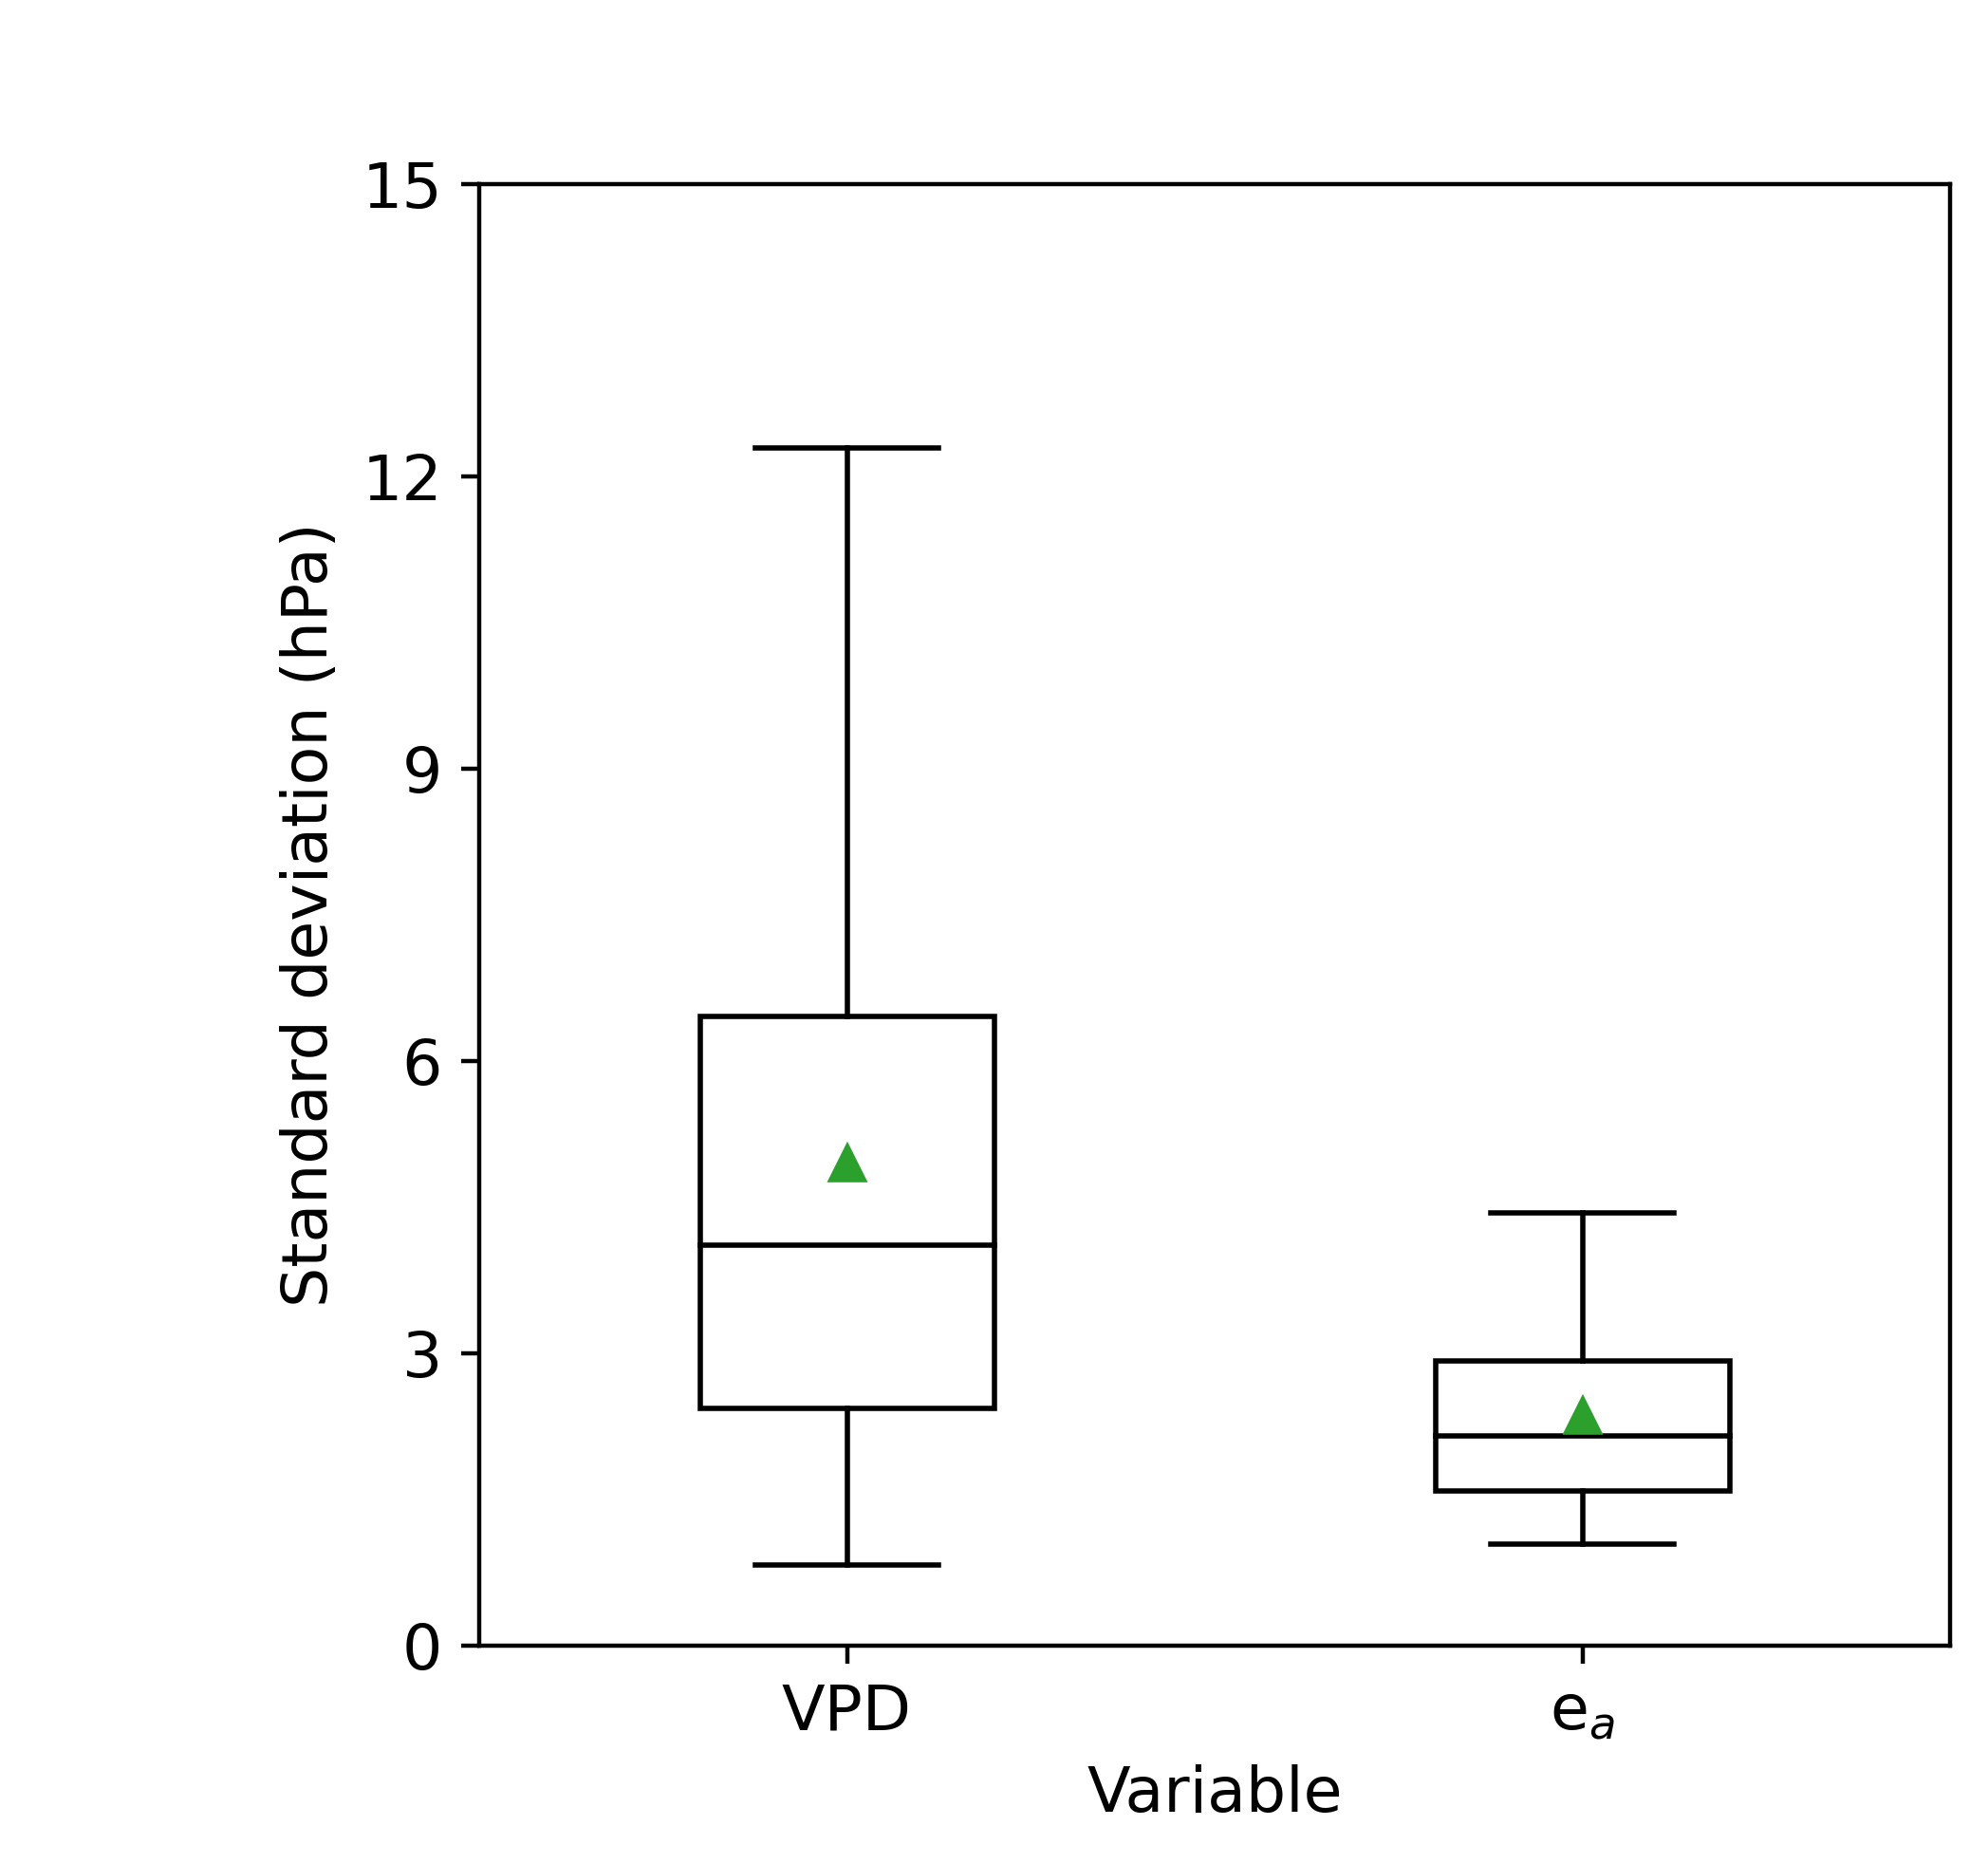

In [7]:
fig = plt.figure(figsize=(5, 5),dpi=400)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')
labels = ['VPD', 'e$_{a}$']

boxplot = ax1.boxplot([std_VPD, std_AVP],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

#ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_xlabel('Variable', size = 12);
ax1.set_ylabel('Standard deviation (hPa)', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(0,15,6))
ax1.set_ylim(0,15)
ax1.text(-0.3, 1.1, " ", transform=ax1.transAxes,
         fontsize=22, fontweight='bold', va='top', ha='left')